In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [18]:
def cross_in_func(pop,*kwargs):
    # kwargs 
    # first: linear, sigmoid 1 or 2...
    # second: x0
    # third: a
    # fouth: make superior part of the sigmoid linear (True) or not
    if not kwargs or kwargs[0] == 0 or kwargs[0] == 'lin':
        return pop
    elif kwargs[0] == 1 or kwargs[0] == 'sigmoid1':
        x0, a = kwargs[1], kwargs[2]
        cival = 1/(1+np.exp(-a*(pop-x0))) 
        if len(kwargs) == 4 and kwargs[3]:
            cival = min(cival, pop)
        return cival
    elif kwargs[0] == 2 or kwargs[0] == 'sigmoid2':
        x0, a = kwargs[1], kwargs[2]
        return 1*pop/(1+np.exp(-a*(pop-x0)))

def pop_evo_eq_noise1(t, pop, qs, noise, ci_kwargs=[0, ], ci_indep_q=False):
    u, x, y = pop[0], pop[1], pop[2]
    div = 1
    if ci_indep_q:
        dxdt = x*(qs[0]*u - cross_in_func(y,*ci_kwargs)) + noise*(u/div-x)
        dydt = y*(qs[1]*u - cross_in_func(x,*ci_kwargs)) + noise*(u/div-y)
    else:
        dxdt = x*(qs[0]*u - qs[1]*cross_in_func(y,*ci_kwargs)) + noise*(u/div-x)
        dydt = y*(qs[1]*u - qs[0]*cross_in_func(x,*ci_kwargs)) + noise*(u/div-y)
    return [-dxdt-dydt, dxdt, dydt]

In [19]:
pop0 = [1.0, 0.0, 0.0]
qs, noise = [1.0, 1.05], 0.25
ci_kwargs = [0, ]
# ci_kwargs = [2, 0.3, 10.0]
ci_indep_q = True
sol = solve_ivp(pop_evo_eq_noise1, [0, 1000], pop0, args=(qs, noise, ci_kwargs, ci_indep_q))

0.6781045436617787


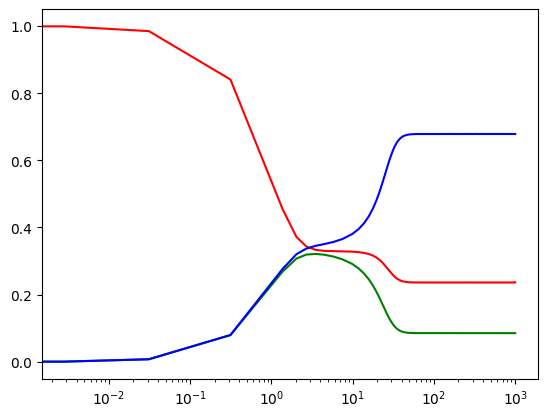

In [20]:
fig, ax = plt.subplots(1, 1)
ax.set_xscale('log')
print(sol.y[2][-1])
ax.plot(sol.t, sol.y[0], color='r')
ax.plot(sol.t, sol.y[1], color='g')
ax.plot(sol.t, sol.y[2], color='b')